## WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt     

# Import API key
from config import w_key1

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(F"There are {len(cities)} cities within {lat_range} latitude and {lng_range} longitude range.")

There are 614 cities within (-90, 90) latitude and (-180, 180) longitude range.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Print log of each city as it's being processed (include City Name and Record Number).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"

query_url = f"{url}&appid={w_key1}&q="

city_name = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind_spd = []
country = []
date = []

#create counter
city_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i %50 == 0 and i >= 50):
        set_count = set_count + 1
        city_count = 0
        city_count +=1
    #city_url = query_url + "&q=" + city
    print("Processing record %s of Set %s | %s" % (city_count, set_count, city))
    
#   parameters = {"q":city,
#                "units":"imperial",
#              "appid": w_key1}
    try:
        city_data = requests.get(query_url+city)
        response_json = city_data.json()
        city_name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        hum.append(response_json["main"]["humidity"])
        cloud.append(response_json["clouds"]["all"])
        wind_spd.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])

    except:
        print("City not found. Skipping...")

print("-------Complete--------")

Processing record 1 of Set 1 | qaanaaq
Processing record 1 of Set 1 | lata
Processing record 1 of Set 1 | hilo
Processing record 1 of Set 1 | bandarbeyla
Processing record 1 of Set 1 | hermanus
Processing record 1 of Set 1 | sturgis
Processing record 1 of Set 1 | new norfolk
Processing record 1 of Set 1 | albany
Processing record 1 of Set 1 | ca mau
Processing record 1 of Set 1 | yellowknife
Processing record 1 of Set 1 | sorvag
City not found. Skipping...
Processing record 1 of Set 1 | bosaso
Processing record 1 of Set 1 | boras
Processing record 1 of Set 1 | souillac
Processing record 1 of Set 1 | mindelo
Processing record 1 of Set 1 | killybegs
Processing record 1 of Set 1 | goroka
Processing record 1 of Set 1 | hasaki
Processing record 1 of Set 1 | barcelos
Processing record 1 of Set 1 | mehamn
Processing record 1 of Set 1 | mount isa
Processing record 1 of Set 1 | santa rosa
Processing record 1 of Set 1 | praia da vitoria
Processing record 1 of Set 1 | illoqqortoormiut
City not fo

### Convert API Call results to a DataFrame

In [4]:
weather_data = pd.DataFrame({"City": city_name,
                             "Latitude": lat,
                             "Longitude": lng,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": cloud,
                             "Wind Speed": wind_spd,
                             "Country": country,
                             "API Call Date": date})
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,14.79,81,0,7.00,GL,1601414101
1,Lata,40.16,-8.33,66.00,88,55,2.06,PT,1601414274
2,Hilo,19.73,-155.09,84.20,66,1,12.75,US,1601414274
3,Bandarbeyla,9.49,50.81,77.90,81,93,22.73,SO,1601414274
4,Hermanus,-34.42,19.23,51.01,86,11,6.76,ZA,1601414275


### Calculate API Call success rate.

In [5]:
# Calculate API Call success rate
rows = len(weather_data.index)-1
print(f"API call returned results for {((rows/len(cities))*100):.2f}% of searched cities.")

API call returned results for 90.72% of searched cities.


### Inspect for and remove cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_cities = weather_data.loc[weather_data['Humidity'] > 100]
humid_cities.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Export the Weather Data by City API call results to a CSV.

In [7]:
# Export the City_Data into a csv
weather_data.to_csv('./output_data/output_cities_AR.csv',sep=',', header=True, index=False)

### Plotting the Data
Completely label all plots with titles, analysis date and axes labels; save each plot as a PNG.

#### Latitude vs. Temperature Plot

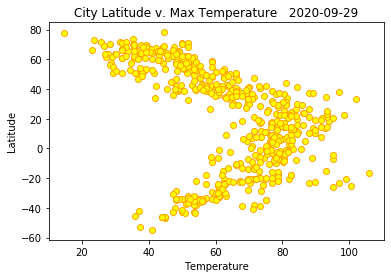

In [8]:
# Create a Scatter Plot for lat v temp
x_temp = weather_data['Max Temp']
y_temp = weather_data['Latitude']
plt.scatter(x_temp, y_temp, c= 'yellow', edgecolor='orange')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
date = dt.date.today()
plt.title("City Latitude v. Max Temperature   " + str(date))
plt.show()

#### Latitude vs. Humidity Plot

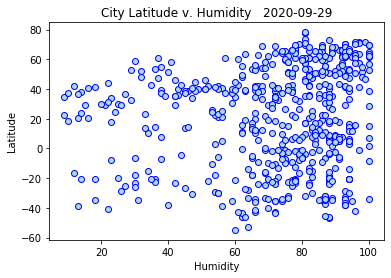

In [9]:
# Create a Scatter Plot for lat v humidity
x_hum = weather_data['Humidity']
y_hum = weather_data['Latitude']
plt.scatter(x_hum,y_hum, color='lightblue', edgecolors='b')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("City Latitude v. Humidity   " + str(date))
plt.show()

#### Latitude vs. Cloudiness Plot

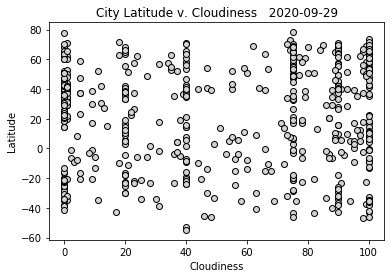

In [10]:
# Create a Scatter Plot for lat v cloudiness
x_cloud = weather_data['Cloudiness']
y_cloud = weather_data['Latitude']
plt.scatter(x_cloud, y_cloud, color='lightgrey', edgecolors='black')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("City Latitude v. Cloudiness   " + str(date))
plt.show()

#### Latitude vs. Wind Speed Plot

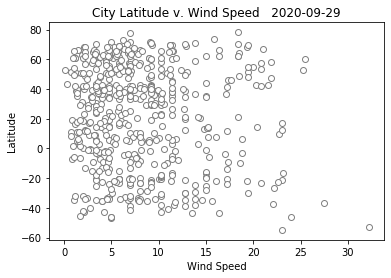

In [11]:
# Create a Scatter Plot for lat v wind speed
x_wind = weather_data['Wind Speed']
y_wind = weather_data['Latitude']
plt.scatter(x_wind,y_wind, c = 'white', edgecolor = 'gray')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title("City Latitude v. Wind Speed   " + str(date))
plt.show()

## Linear Regression
Create Northern and Southern Hemisphere DataFrames

In [12]:
no_hem = weather_data.loc[weather_data['Latitude'] > 0]
no_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,14.79,81,0,7.00,GL,1601414101
1,Lata,40.16,-8.33,66.00,88,55,2.06,PT,1601414274
2,Hilo,19.73,-155.09,84.20,66,1,12.75,US,1601414274
3,Bandarbeyla,9.49,50.81,77.90,81,93,22.73,SO,1601414274
5,Sturgis,41.80,-85.42,60.80,55,90,6.93,US,1601414275


In [13]:
so_hem = weather_data.loc[weather_data['Latitude'] < 0]
so_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Hermanus,-34.42,19.23,51.01,86,11,6.76,ZA,1601414275
6,New Norfolk,-42.78,147.06,50.00,72,100,2.08,AU,1601414275
12,Souillac,-20.52,57.52,71.60,94,40,5.82,MU,1601414278
15,Goroka,-6.08,145.39,60.67,87,78,1.72,PG,1601414279
19,Mount Isa,-20.73,139.50,62.60,36,9,3.36,AU,1601414280


#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: 70.14%


Text(0.5, 1.0, 'N. Hemisphere City Latitude v. Temperature   2020-09-29')

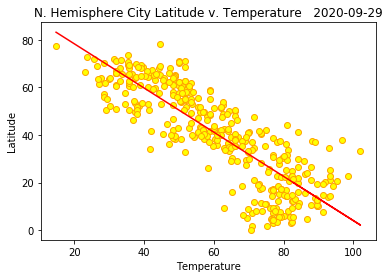

In [14]:
n_x_temp = no_hem['Max Temp']
n_y_temp = no_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_temp, n_y_temp)
regress_values = n_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(n_x_temp, n_y_temp, c = 'yellow', edgecolor = 'orange')
plt.plot(n_x_temp,regress_values,"r-")
plt.annotate(line_eq, (10,10), fontsize = 15, color = 'black')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("N. Hemisphere City Latitude v. Temperature   " + str(date))

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: 47.08%


Text(0.5, 1.0, 'S. Hemisphere City Latitude v. Temperature   2020-09-29')

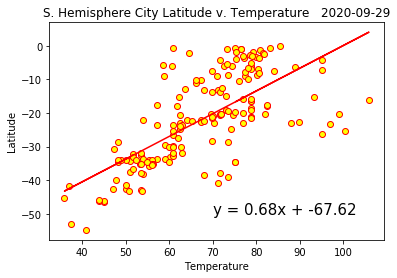

In [15]:
s_x_temp = so_hem['Max Temp']
s_y_temp = so_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_temp, s_y_temp)
regress_values = s_x_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(s_x_temp, s_y_temp, c = 'yellow', edgecolor = 'red')
plt.plot(s_x_temp,regress_values,"r-")
plt.annotate(line_eq, (70,-50), fontsize = 15, color='black')
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title("S. Hemisphere City Latitude v. Temperature   " + str(date))

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: 3.58%


Text(0.5, 1.0, 'N. Hemisphere City Latitude v. Humidity   2020-09-29')

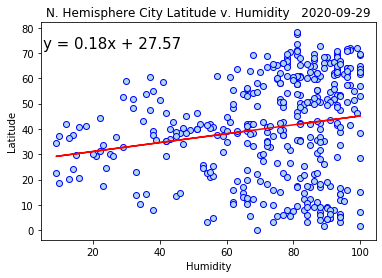

In [16]:
n_x_hum = no_hem['Humidity']
n_y_hum = no_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_hum, n_y_hum)
regress_values = n_x_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(n_x_hum,n_y_hum, color='lightblue', edgecolors='b')
plt.plot(n_x_hum,regress_values,"r-")
plt.annotate(line_eq, (5,72), fontsize = 15, color = 'black')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("N. Hemisphere City Latitude v. Humidity   " + str(date))

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: 0.46%


Text(0.5, 1.0, 'S. Hemisphere City Latitude v. Humidity   2020-09-29')

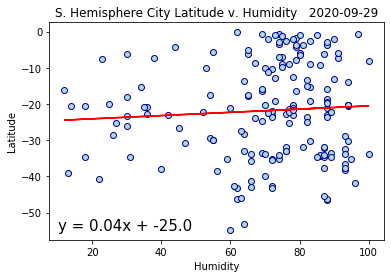

In [17]:
s_x_hum = so_hem['Humidity']
s_y_hum = so_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_hum, s_y_hum)
regress_values = s_x_hum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(s_x_hum,s_y_hum, color='lightblue', edgecolors='darkblue')
plt.plot(s_x_hum,regress_values,"r-")
plt.annotate(line_eq, (10,-55), fontsize = 15, color = 'black')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title("S. Hemisphere City Latitude v. Humidity   " + str(date))

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: 1.15%


Text(0.5, 1.0, 'N. Hemisphere City Latitude v. Cloudiness   2020-09-29')

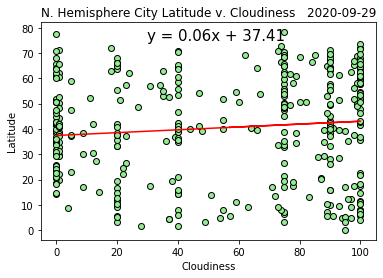

In [18]:
n_x_cloud = no_hem['Cloudiness']
n_y_cloud = no_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_cloud, n_y_cloud)
regress_values = n_x_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(n_x_cloud,n_y_cloud, color='lightgreen', edgecolors='black')
plt.plot(n_x_cloud,regress_values,"r-")
plt.annotate(line_eq, (30,75), fontsize = 15, color = 'black')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("N. Hemisphere City Latitude v. Cloudiness   " + str(date))

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: 0.00%


Text(0.5, 1.0, 'S. Hemisphere City Latitude v. Cloudiness   2020-09-29')

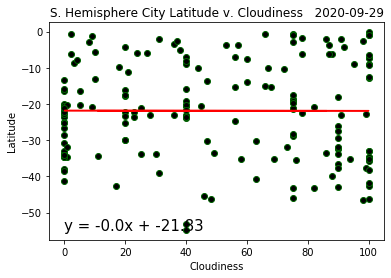

In [19]:
s_x_cloud = so_hem['Cloudiness']
s_y_cloud = so_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_cloud, s_y_cloud)
regress_values = s_x_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(s_x_cloud, s_y_cloud, color='black', edgecolors='darkgreen')
plt.plot(s_x_cloud,regress_values,"r-")
plt.annotate(line_eq, (0,-55), fontsize = 15, color = 'black')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("S. Hemisphere City Latitude v. Cloudiness   " + str(date))

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: 0.49%


Text(0.5, 1.0, 'N. Hemisphere City Latitude v. Wind Speed (mph)   2020-09-29')

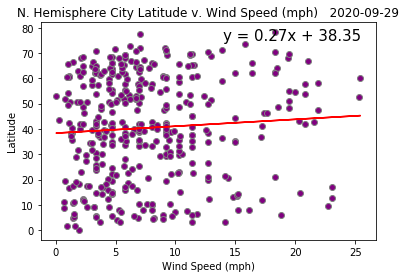

In [20]:
n_x_wind = no_hem['Wind Speed']
n_y_wind = no_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_wind, n_y_wind)
regress_values = n_x_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(n_x_wind, n_y_wind, color='purple', edgecolors='gray')
plt.plot(n_x_wind,regress_values,"r-")
plt.annotate(line_eq, (14,75), fontsize = 15, color = 'black')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("N. Hemisphere City Latitude v. Wind Speed (mph)   " + str(date))

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: 3.12%


Text(0.5, 1.0, 'S. Hemisphere City Latitude v. Wind Speed (mph)   2020-09-29')

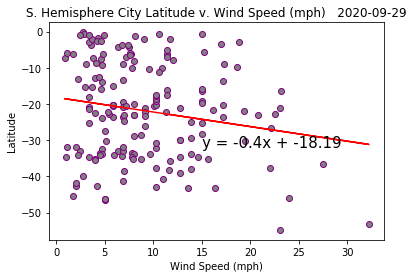

In [21]:
s_x_wind = so_hem['Wind Speed']
s_y_wind = so_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_wind, s_y_wind)
regress_values = s_x_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"R-squared value: {(rvalue**2)*100:.2f}%")
plt.scatter(s_x_wind, s_y_wind, color='gray', edgecolors='purple')
plt.plot(s_x_wind,regress_values,"r-")
plt.annotate(line_eq, (15, -32), fontsize = 15, color = 'black')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title("S. Hemisphere City Latitude v. Wind Speed (mph)   " + str(date))